<a href="https://colab.research.google.com/github/gulabpatel/ML_Algos/blob/main/02%3A%20Clustering_GMM(Gaussian_Mixture_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Help is available on https://www.youtube.com/watch?v=WsGNJYCxwNM

In [ ]:
!pip install pmlb

     |████████████████████████████████| 645kB 8.3MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
#For plotting
import pandas as pd
import numpy as np
from plotnine import *

import scipy
from scipy import stats as st
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import time
from pmlb import fetch_data
import matplotlib.pyplot as plt
#for matrix math


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

#for plotting
import seaborn as sns
sns.set_style("white")
%matplotlib inline

In [ ]:
bk = pd.read_csv('/content/burger-king-items.txt', sep='\t')
bk

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,FatFREEMilk(8oz),NaN,90,0.0,9,0.0,0.0,0.0,5,125,13,0.0,12,0,0,1,0
118,1%LowFatChocolateMilk(8oz),NaN,160,25.0,8,2.5,1.5,0.0,15,150,26,1.0,25,0,0,1,0
119,VanillaMilkShake12fl oz,NaN,350,100.0,8,11.0,8.0,0.0,40,290,57,0.0,48,0,0,1,0
120,ChocolateMilkShake12fl oz,NaN,400,100.0,8,11.0,8.0,0.0,40,330,68,0.0,58,0,0,1,0


In [ ]:
features = ['Calories', 'Sodium(mg)']
X = bk[features]
X.sample(10)

,Calories,Sodium(mg)
87,160,320
69,300,690
98,630,1110
22,590,1450
105,320,900
93,400,380
50,310,490
21,800,1640
96,550,650
64,240,550


##Scaling

In [ ]:
z = StandardScaler()
X[features] = z.fit_transform(X)

##Define Model

In [ ]:
EM = GaussianMixture(n_components=3) #number of clusters
EM.fit(X)
cluster = EM.predict(X)
cluster  #hard assignment

array([0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# cluster = EM.predict_proba(X)
# cluster  #Soft assignment

SILHOUETTE:  0.357211963389611


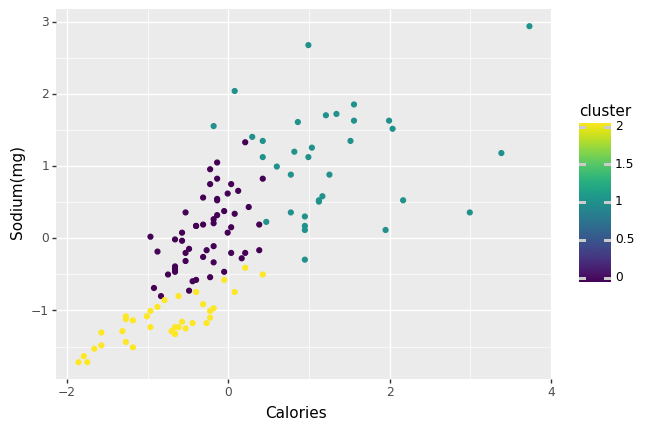

<ggplot: (-9223363277886466216)>

In [ ]:
print("SILHOUETTE: ", silhouette_score(X, cluster))
X['cluster'] = cluster

(ggplot(X, aes(x = "Calories", y = "Sodium(mg)", color = 'cluster'))+geom_point())

#Multiple Dimension

In [ ]:
features = ['Sugar(g)', 'Protein(g)', 'Fat(g)']
X = bk[features]
z = StandardScaler()
X[features] = z.fit_transform(X)

In [ ]:
EM = GaussianMixture(n_components=3)
EM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
cluster = EM.predict(X)
cluster  #Hard clustering

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2])

In [ ]:
# cluster = EM.predict_proba(X)
# cluster  #soft clustering

In [ ]:
print("SILHOUETTE: ", silhouette_score(X, cluster))

SILHOUETTE:  0.5250510147137473


In [ ]:
X['cluster'] = cluster

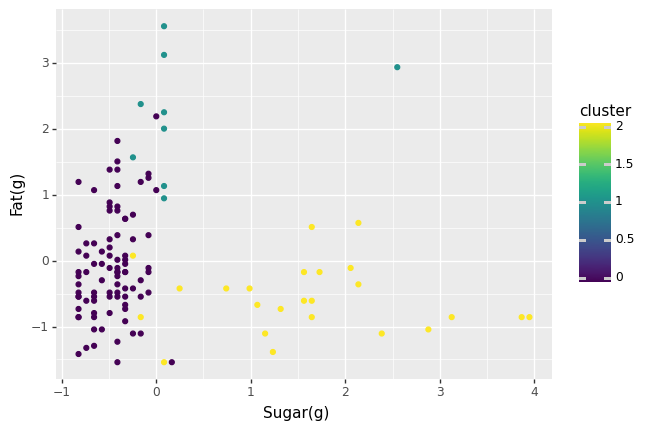

<ggplot: (-9223363277895948302)>

In [ ]:
(ggplot(X, aes(x = "Sugar(g)", y = "Fat(g)", color = 'cluster'))+geom_point())

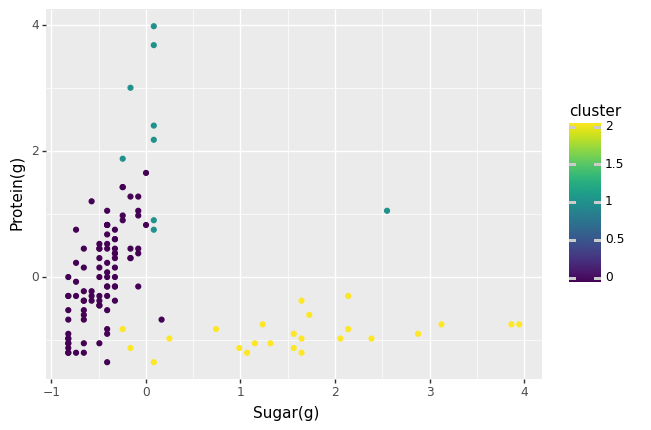

<ggplot: (8758958800837)>

In [ ]:
(ggplot(X, aes(x = "Sugar(g)", y = "Protein(g)", color = 'cluster'))+geom_point())

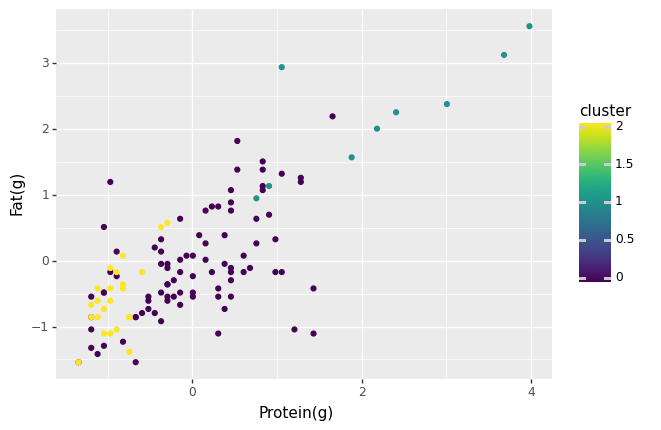

<ggplot: (8758958831862)>

In [ ]:
(ggplot(X, aes(x = "Protein(g)", y = "Fat(g)", color = 'cluster')) + geom_point())